In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score
import pandas as pd

In [28]:
df = pd.read_csv('Mall_Customers.csv')
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [29]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [30]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [31]:
df["Gender"] = df["Gender"].astype('category').cat.codes
df.drop('CustomerID',axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


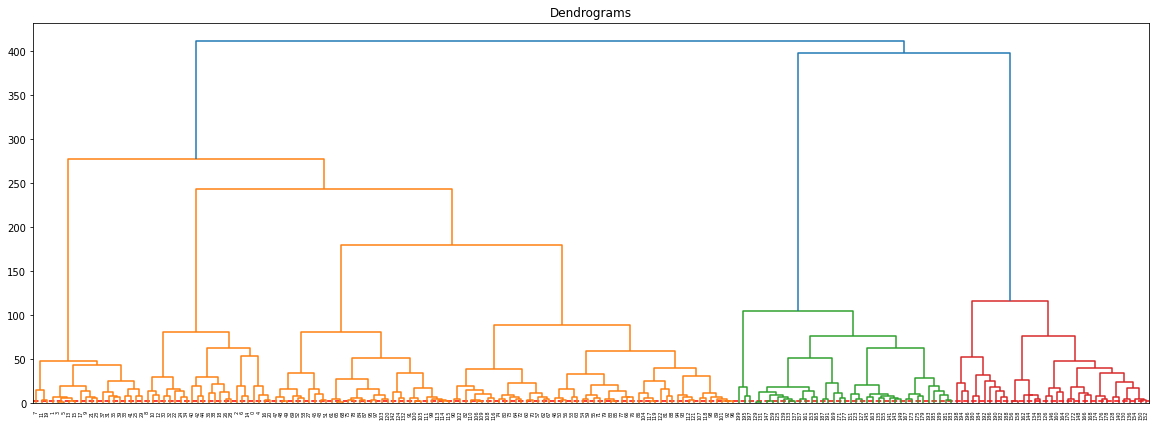

In [32]:
plt.figure(figsize = (20,7))
plt.title('Dendrograms')
plt.axhline(y=3, color='r', linestyle='--')
dend = sch.dendrogram(sch.linkage(df, method='ward'))

In [33]:
model = AgglomerativeClustering(n_clusters = 4)

y_means = model.fit_predict(df)

In [35]:
silhouette = silhouette_score(df, y_means)
print('Silhouette Score: ', silhouette )

davies_bouldin = davies_bouldin_score(df, y_means)
print('Davies Bouldin Score: ', davies_bouldin )

Silhouette Score:  0.4102091359195185
Davies Bouldin Score:  0.8333122494122862
